# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images

Similarity comparation is made both on text and images



## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [41]:
import os
import cv2
import glob
import data_helpers
import process_image
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [42]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[17]
print("-----Will use language:  '%s'" % (lang))

Will use tool 'Tesseract (sh)'


OSError: [Errno 12] Cannot allocate memory

In [16]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
files_grabbed = []
for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 100 images loaded


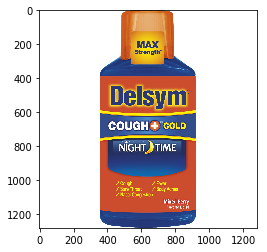

In [32]:
# Get some images to show
randindex = randint(0, len(files_grabbed)-1)
img = cv2.imread(files_grabbed[randindex])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#cv2.imshow("original", img)
#cv2.waitKey(0)

In [33]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(img), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

------Following is raw text------
MAX

Strength*

(Aaa,
Delsyim

Cocos

NIGHT) TIME
------Following is cleaned text------
maxstrength*(aaa,delsyimcocosnight) time


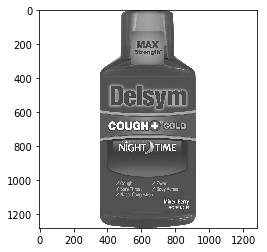

In [39]:
newimg = process_image.improve(files_grabbed[randindex])
newimgshow = cv2.cvtColor(newimg, cv2.COLOR_GRAY2RGB)
plt.imshow(newimgshow)

In [40]:
#Detect and recognize text on image
txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(txt)

print('------Following is cleaned text------')
print(data_helpers.process_raw(txt))

OSError: [Errno 12] Cannot allocate memory

In [7]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-08-21-14:25:29
INFO:tensorflow:Restoring parameters from /tmp/tmpdhd6F4/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2017-08-21-14:25:29
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9908, global_step = 2000, loss = 0.0382241


{'accuracy': 0.99080002, 'global_step': 2000, 'loss': 0.038224086}

INFO:tensorflow:Restoring parameters from /tmp/tmpdhd6F4/model.ckpt-2000


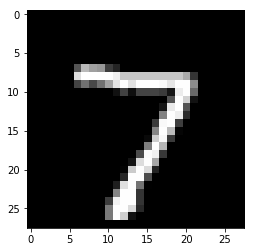

Model prediction: 7


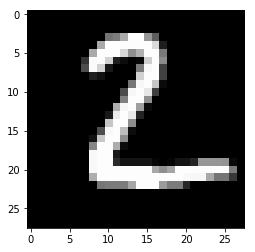

Model prediction: 2


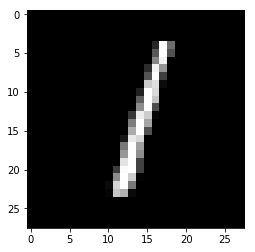

Model prediction: 1


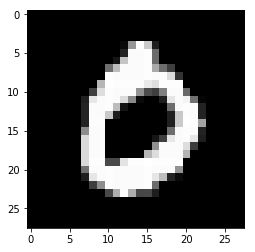

Model prediction: 0


In [8]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])